In [1]:
# Standard libraries
import numpy as np
import json
import h5py
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntProgress
from IPython.display import display

# Append base directory
import os,sys,inspect
rootname = "mesoscopic-functional-connectivity"
thispath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootpath = os.path.join(thispath[:thispath.index(rootname)], rootname)
codepath = os.path.join(rootpath, "code_python")
sys.path.append(codepath)
print("Appended root directory", codepath)

# User libraries
from lib.info_metrics.projector_metrics import metric3D

from lib.stat import graph_lib
#from lib.info_metrics.corr_lib import corr, crossCorr
from lib.data_io.qt_wrapper import gui_fnames, gui_fpath
from lib.data_io.data_fc_db import DataFCDatabase
import lib.plots.connectomics as connectomics
import lib.plots.connectomics_db as connectomics_db
import lib.plots.data_plots as data_plots
import lib.plots.data_plots_db as data_plots_db
from lib.plots.data_projectors import collect, plot_1D

%load_ext autoreload
%autoreload 2

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Appended root directory /media/aleksejs/DataHDD/work/codes/comp-neuro/analysis-mesoscopic/mesoscopic-functional-connectivity/code_python


# Reading Data
* Automatically find subfolders for FC, data and behaviour
* Parse filenames and folders to identify mice, dates and analysis types
* Read all datasets into memory (so far works)

**TODO**:
* Integrate connectomics analysis with pandas

In [2]:
# tmp_path = root_path_data if 'root_path_data' in locals() else "./"
params = {}
# params['root_path_data']  = gui_fpath("Path to data collection",  './')
params['root_path_data']  = '/media/aleksejs/DataHDD/work/data/neuronal'
#params['root_path_paw']   = gui_fpath("Path to Paw data",         params['root_path_data'])
#params['root_path_lick']  = gui_fpath("Path to Lick data",        params['root_path_paw'])
#params['root_path_whisk'] = gui_fpath("Path to Whisk Data",       params['root_path_lick'])
# params['root_path_te']    = gui_fpath("Select TE results folder", params['root_path_data'])

In [3]:
dataDB = DataFCDatabase(params)

Target trial within [0, 8] sec. Total target timesteps 161
Searching for channel labels
Searching for data files
No paw path provided, skipping
No lick path provided, skipping
No whisk path provided, skipping


In [4]:
#display(dataDB.summary)
#display(dataDB.summaryTE)

In [5]:
dataDB.read_te_files()
dataDB.read_neuro_files()
dataDB.read_resample_paw_files()
dataDB.read_resample_lick_files()   # Currently does not work. Ask Yaro if we need it
dataDB.read_resample_whisk_files()

No TE files loaded, skipping reading part


IntProgress(value=0, description='Read Neuro Data:', max=220)

Calculated performance 0.7264150943396226 does not match external 0.7333333333333333
Calculated performance 0.803680981595092 does not match external 0.808641975308642
Calculated performance 0.8411764705882353 does not match external 0.8436578171091446
Calculated performance 0.956989247311828 does not match external 0.9621621621621622
Calculated performance 0.6808510638297872 does not match external 0.6956521739130435
Calculated performance 0.9582366589327146 does not match external 0.9604651162790697
Calculated performance 0.4851258581235698 does not match external 0.4840182648401826
--Warning: For iMISS behaviour max index 437 exceeds nTrials 437
---Cropped excessive behaviour trials from 86 to 85
Calculated performance 0.42795389048991356 does not match external 0.6902017291066282
Calculated performance 0.2534562211981567 does not match external 0.30386740331491713
Calculated performance 0.4444444444444444 does not match external 0.47227191413237923
Calculated performance 0.56680161

--Warning: No performance metrics found for /media/aleksejs/DataHDD/work/data/neuronal/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/aleksejs/DataHDD/work/data/neuronal/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/aleksejs/DataHDD/work/data/neuronal/mvg48/mvg_8 ; Using calculated
--Warning: No performance metrics found for /media/aleksejs/DataHDD/work/data/neuronal/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/aleksejs/DataHDD/work/data/neuronal/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/aleksejs/DataHDD/work/data/neuronal/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/aleksejs/DataHDD/work/data/neuronal/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/aleksejs/DataHDD/work/data/neuronal/mvg48/mvg_9 ; Using calculated
--Warning: No performance metrics found for /media/aleks

In [6]:
pTHR = 0.7
dataDB.mark_days_expert_naive(pTHR)

# Analysis

## Performance

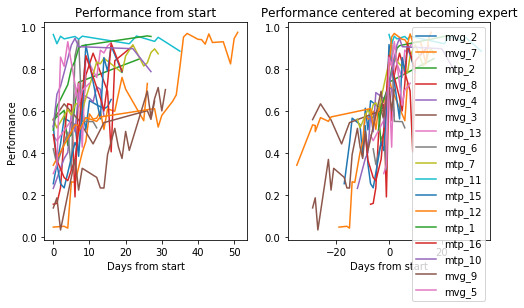

In [7]:
data_plots_db.plot_performance_by_days(dataDB)

IntProgress(value=0, description='Collecting mean for data', max=119)

IntProgress(value=0, description='Collecting mean for data')

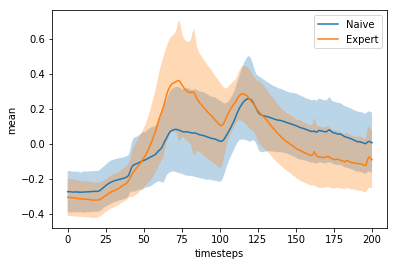

In [8]:
def compare_expert_naive(dataDB, metricName, zscoreDim=None):
    metricParam = {'src_dim_order' : "rsp", 'trg_dim_order' : "s"}
    if zscoreDim is not None:
        metricParam['zscoreDim'] = zscoreDim

    metricNaive = collect(dataDB, {"isExpert" : False}, metricName, metricParam)
    metricExpert = collect(dataDB, {"isExpert" : True}, metricName, metricParam)
    # metric = collect(dataDB, {"mousename" : "mvg_8"}, "mean", metricParam)

    fig, ax = plt.subplots()
    # plot_1D(ax, metric)
    plot_1D(ax, metricNaive, label='Naive')
    plot_1D(ax, metricExpert, label='Expert')
    plt.xlabel('timesteps')
    plt.ylabel(metricName)
    plt.legend()
    plt.show()
    
compare_expert_naive(dataDB, "mean", zscoreDim="sr")

## Data Exploration

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


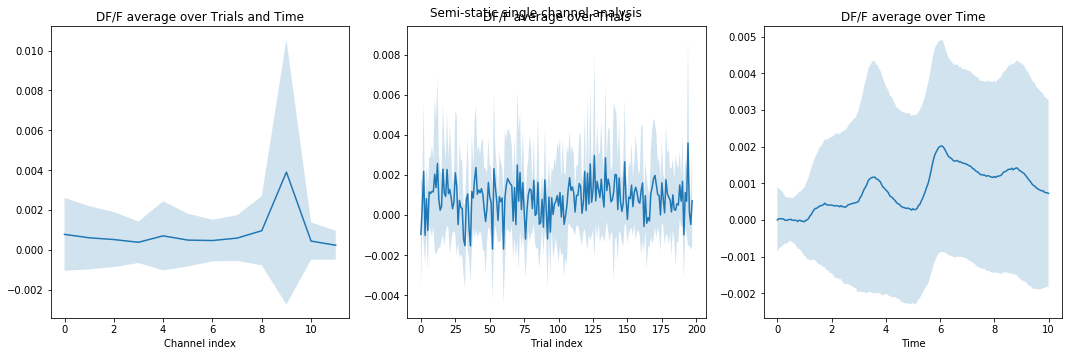

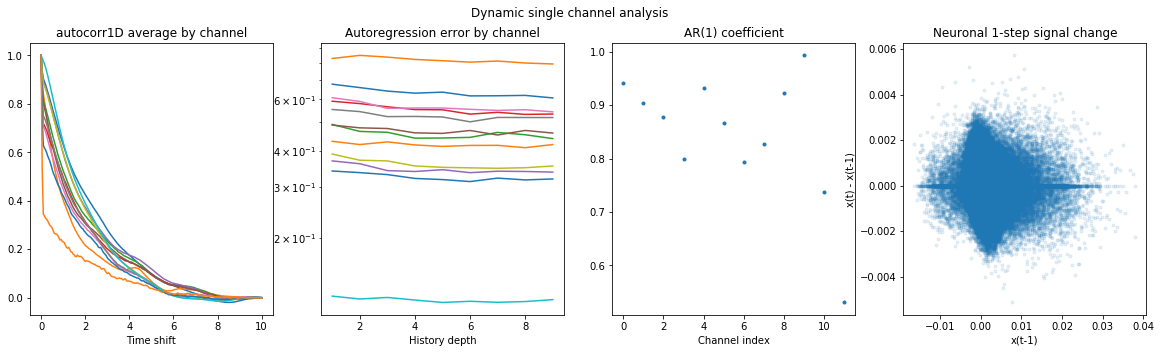

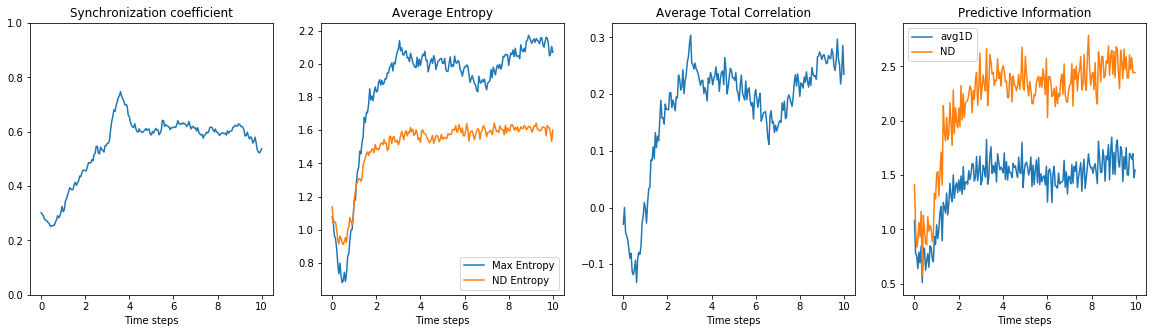

In [11]:
FPS = 20

# Select example session
dataThis = dataDB.dataNeuronal[0]

fig, ax = plt.subplots(ncols=3, figsize=(15, 5), tight_layout=True)
fig.suptitle("Semi-static single channel analysis")
data_plots.plot_mean_variance_bychannel(ax[0], dataThis)
data_plots.plot_mean_variance_bytrial(ax[1],dataThis)
data_plots.plot_mean_variance_bytime(ax[2], dataThis, fps=FPS)

fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
fig.suptitle("Dynamic single channel analysis")
data_plots.plot_autocorrelation_bychannel(ax[0], dataThis, fps=FPS, withFill=False)
data_plots.plot_ar(ax[1], ax[2], dataThis, histMax=10, fps=FPS)
data_plots.plot_fit_gamma(ax[3], dataThis)

fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
data_plots.plot_mean_correlation_bytime(ax[0], dataThis, fps=FPS)
data_plots.plot_entropy_ND_bytime(ax[1], ax[2], ax[3], dataThis, fps=FPS)

plt.show()